In [1]:
import numpy as np
import os
import pickle
from astropy.io import fits
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches

#mpl.use('Tkagg')
from IPython.core.magic import register_cell_magic
from karabo_simutils import *

@register_cell_magic
def skip(line, cell):
    return

## Radio Bursts 

In [2]:
freq_rb1 = np.linspace(80, 200, 100)
duration_rb1 = np.linspace(3600, 3600 * 24, 100)  # in sec
fd_rb1 = np.linspace(10, 100, 100)

freq_rb2 = np.linspace(20, 150, 100)
duration_rb2 = np.linspace(180, 1800, 100)  # in sec
fd_rb2 = np.linspace(1000, 10000, 100)

freq_rb3 = np.linspace(20, 150, 100)
duration_rb3 = np.linspace(60, 3600, 100)  # in sec
fd_rb3 = np.linspace(10, 100, 100)

freq_rb4 = np.linspace(20, 150, 100)
duration_rb4 = np.linspace(180, 3600, 100)  # in sec
fd_rb4 = np.linspace(10, 100, 100)

freq_rb5 = np.linspace(80, 200, 100)
duration_rb5 = np.linspace(60, 180, 100)  # in sec
fd_rb5 = np.linspace(10, 100, 100)

## Plot radio burts time-frequency ranges

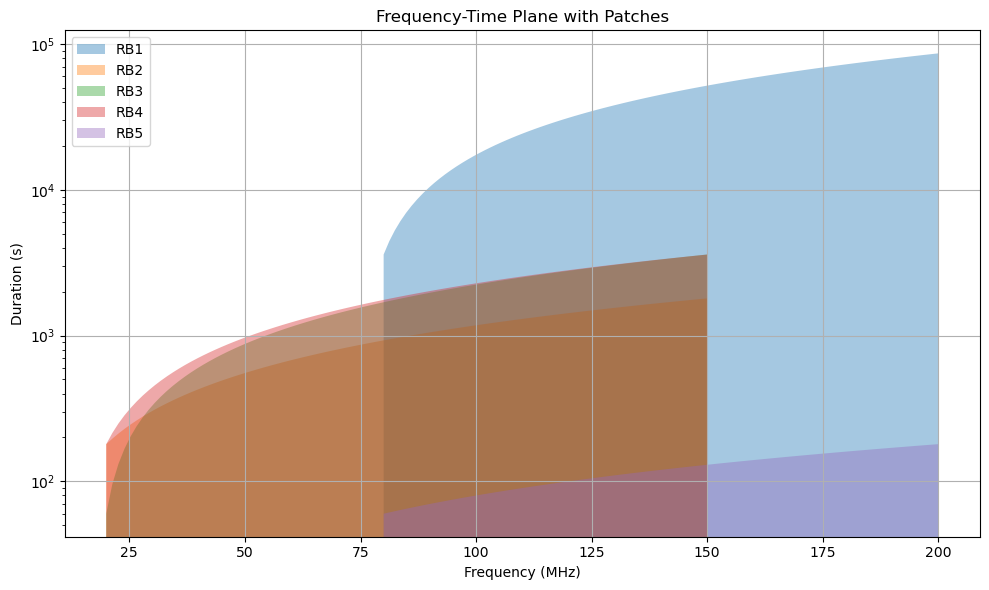

In [3]:
%matplotlib inline
# Data definition
freq_rb1 = np.linspace(80, 200, 100)
duration_rb1 = np.linspace(3600, 3600 * 24, 100)  # in sec

freq_rb2 = np.linspace(20, 150, 100)
duration_rb2 = np.linspace(180, 1800, 100)  # in sec

freq_rb3 = np.linspace(20, 150, 100)
duration_rb3 = np.linspace(60, 3600, 100)  # in sec

freq_rb4 = np.linspace(20, 150, 100)
duration_rb4 = np.linspace(180, 3600, 100)  # in sec

freq_rb5 = np.linspace(80, 200, 100)
duration_rb5 = np.linspace(60, 180, 100)  # in sec

# Plotting
plt.figure(figsize=(10, 6))

plt.fill_between(freq_rb1, duration_rb1, label='RB1', alpha=0.4)
plt.fill_between(freq_rb2, duration_rb2, label='RB2', alpha=0.4)
plt.fill_between(freq_rb3, duration_rb3, label='RB3', alpha=0.4)
plt.fill_between(freq_rb4, duration_rb4, label='RB4', alpha=0.4)
plt.fill_between(freq_rb5, duration_rb5, label='RB5', alpha=0.4)

plt.xlabel('Frequency (MHz)')
plt.ylabel('Duration (s)')
plt.title('Frequency-Time Plane with Patches')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Optional: log scale for better visual separation
plt.tight_layout()
plt.show()


## Define Solar Disk

(12, 100)
(8163, 12)
(8063, 12)


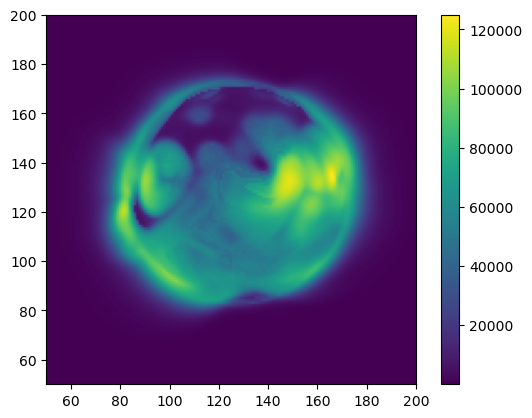

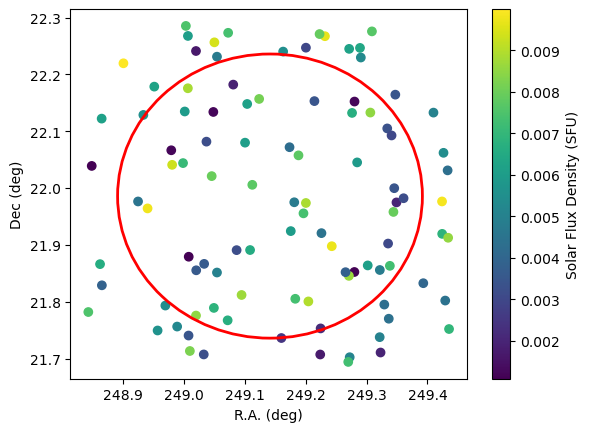

In [ ]:
%matplotlib inline
#-------- Define SkyModel Parameters
skymodel_path='/data/rohit/20151203_240MHz_psimas.fits'
ra_sun_center=249.141666667;dec_sun_center=21.986 #16 34 34.52 -21 59 09.7
skymodel_cellsize=22.5 # in arcsec
start_frequency_hz_ = 150.e6
sm_threshold = 0.1
sm_fscale = 1 # spectral index
add_sm = 'random' # 'point' / 'random'
point_source_bool = False # tag 1 / tag 0 is ideal case
point_flux = 100.e4
random_points = False # tag 2
if(add_sm=='random'):
    size_ = 100
else:
    size_ = 1
randsize = 100
flux_rand_low = 10 # Jy
flux_rand_high = 100 # Jy
angle_rand = 0.3 # in degrees
source_cut=16000
save_sources = True
path_ = '/data/rohit/solar-sky-models/'

randfile = '/data/rohit/solar-sky-models/solar_ska1low_forward-20151203-rand_snap-1-min-1-channel_skymodel.sm'
rand_array = np.loadtxt(randfile)
print(rand_array.shape)
sm_save_str = ''
sky_rand_data1,solar_rand_map,solar_rand_map_jy=get_solar_skydata(skymodel_path,sm_save_str, start_frequency_hz_,\
            ra_sun_center,dec_sun_center, skymodel_cellsize,sm_fscale,\
            sm_threshold, save_sources,source_cut,\
            add_sm, randfile, randsize, point_flux, flux_rand_low, flux_rand_high,angle_rand)
print(sky_rand_data1.shape)
add_sm_none = 'None'
sky_data1,solar_map,solar_map_jy=get_solar_skydata(skymodel_path,sm_save_str, start_frequency_hz_,\
            ra_sun_center,dec_sun_center, skymodel_cellsize,sm_fscale,\
            sm_threshold, save_sources,source_cut,\
            add_sm_none, randfile, randsize, point_flux, flux_rand_low, flux_rand_high,angle_rand)
print(sky_data1.shape)


f,ax = plt.subplots(1,1)
im=ax.imshow(solar_map_jy,origin='lower')
plt.colorbar(im)2
ax.set_xlim(50,200)
ax.set_ylim(50,200)
plt.show()

f, ax = plt.subplots(1, 1)
sc = ax.scatter(rand_array[0], rand_array[1], c=rand_array[2]/10000, cmap='viridis')  # or any other colormap
plt.colorbar(sc, ax=ax, label='Solar Flux Density (SFU)')
circle = patches.Circle((249.141666667, 21.986), 0.25, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(circle)
ax.set_ylabel('Dec (deg)')
ax.set_xlabel('R.A. (deg)')
#ax.set_xlim(50, 200)
#ax.set_ylim(50, 200)
plt.show()

## SEFD & Sensitivty Calculations 

In [ ]:

n_ant = 512
ant_idx = np.array([n_ant])